# Cyclone Patterns & Classification

Excel file contains 4 cyclone Type classification 
1.Typhoon
2.Severe Tropical Storm
3.Tropical Storm
4.Tropical Depression

Classification     TypeName                      Type
 
   1               Typhoon                       T
   2               Severe Tropical Storm         SS
   3               Tropical Storm                S
   4               Tropical Depression           D

In [253]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

In [254]:
cyc_df=pd.read_excel('/Users/n.sunik/Downloads/Cyclone Excel File.xlsx')
#/Users/n.sunik/IBM_Internship

In [255]:
cyc_df

,Year,Month,Date,Time,CycloneName,TypeName,Type,Wind(km/h),Pressure(mb)
0,2021.0,December,Dec 18,11:30,Typhoon Rai (Odette) 2021,Typhoon,T,170.0,962.0
1,2021.0,December,Dec 19,17:30,Typhoon Rai (Odette) 2021,Typhoon,T,165.0,957.0
2,2021.0,December,Dec 19,23:30,Typhoon Rai (Odette) 2021,Typhoon,T,170.0,962.0
3,2021.0,December,Dec 17,17:30,Typhoon Rai (Odette) 2021,Typhoon,T,175.0,963.0
4,2021.0,December,Dec 15,5:30,Typhoon Rai (Odette) 2021,Typhoon,T,120.0,985.0
...,...,...,...,...,...,...,...,...,...
169,2021.0,NaN,2021-01-19 00:00:00,02:30:00,NaN,TROPICAL STORM,S,90.0,997.0
170,2021.0,NaN,2021-01-19 00:00:00,02:30:00,NaN,TROPICAL STORM,S,90.0,996.0
171,2021.0,NaN,2021-01-20 00:00:00,02:30:00,NaN,TROPICAL STORM,S,80.0,996.0
172,2021.0,NaN,2021-01-20 00:00:00,05:30:00,NaN,TROPICAL STORM,S,65.0,1000.0


174 rows × 9 columns

In [256]:
cyc_df.describe(include='all')

,Year,Month,Date,Time,CycloneName,TypeName,Type,Wind(km/h),Pressure(mb)
count,171.000000,42,172,172,42,172,170,172.000000,172.000000
unique,NaN,3,71,17,3,4,4,NaN,NaN
top,NaN,September,2021-01-18 00:00:00,02:30:00,Typhoon Malou 2021,TROPICAL STORM,S,NaN,NaN
freq,NaN,25,8,25,25,53,53,NaN,NaN
mean,2016.660819,NaN,NaN,NaN,NaN,NaN,NaN,93.866279,987.058140
std,4.124766,NaN,NaN,NaN,NaN,NaN,NaN,37.986911,14.509005
min,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,949.000000
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,979.000000
50%,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,989.000000
75%,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,120.000000,1000.000000


In [257]:
cyc_df.head()

,Year,Month,Date,Time,CycloneName,TypeName,Type,Wind(km/h),Pressure(mb)
0,2021.0,December,Dec 18,11:30,Typhoon Rai (Odette) 2021,Typhoon,T,170.0,962.0
1,2021.0,December,Dec 19,17:30,Typhoon Rai (Odette) 2021,Typhoon,T,165.0,957.0
2,2021.0,December,Dec 19,23:30,Typhoon Rai (Odette) 2021,Typhoon,T,170.0,962.0
3,2021.0,December,Dec 17,17:30,Typhoon Rai (Odette) 2021,Typhoon,T,175.0,963.0
4,2021.0,December,Dec 15,5:30,Typhoon Rai (Odette) 2021,Typhoon,T,120.0,985.0


In [258]:
cyc_df.tail()

,Year,Month,Date,Time,CycloneName,TypeName,Type,Wind(km/h),Pressure(mb)
169,2021.0,NaN,2021-01-19 00:00:00,02:30:00,NaN,TROPICAL STORM,S,90.0,997.0
170,2021.0,NaN,2021-01-19 00:00:00,02:30:00,NaN,TROPICAL STORM,S,90.0,996.0
171,2021.0,NaN,2021-01-20 00:00:00,02:30:00,NaN,TROPICAL STORM,S,80.0,996.0
172,2021.0,NaN,2021-01-20 00:00:00,05:30:00,NaN,TROPICAL STORM,S,65.0,1000.0
173,2021.0,NaN,2021-01-21 00:00:00,05:30:00,NaN,TROPICAL STORM,S,85.0,999.0


In [259]:
cyc_df.dtypes

Year            float64
Month            object
Date             object
Time             object
CycloneName      object
TypeName         object
Type             object
Wind(km/h)      float64
Pressure(mb)    float64
dtype: object

In [260]:
cyc_df.Type.value_counts()

S     53
D     50
T     40
SS    27
Name: Type, dtype: int64

In [261]:
# delete a unnecessary columns with respect to  target value cycloneType/cyclone Type NAME
cyc_df = cyc_df.drop(columns = ['CycloneName','Month','Date','Time','Type'])
cyc_df.head()

,Year,TypeName,Wind(km/h),Pressure(mb)
0,2021.0,Typhoon,170.0,962.0
1,2021.0,Typhoon,165.0,957.0
2,2021.0,Typhoon,170.0,962.0
3,2021.0,Typhoon,175.0,963.0
4,2021.0,Typhoon,120.0,985.0


In [262]:
#df_slovakia=df[(df['location']=='Slovakia')]

In [263]:
cyc_df.TypeName.unique()

array(['Typhoon', 'TROPICAL DEPRESSION', nan, 'SEVERE TROPICAL STORM',
       'TROPICAL STORM'], dtype=object)

In this excel file cyclone data are classified as
1.Tropical Depression
2.Tropical Storm 
3.Typhoon 
4.SEVERE TROPICAL STORM

In [264]:
#cyc_df.Year.sort()
cyc_df.Year.sort_values()

43     2009.0
122    2009.0
121    2009.0
93     2009.0
47     2009.0
        ...  
119    2021.0
173    2021.0
41        NaN
92        NaN
120       NaN
Name: Year, Length: 174, dtype: float64

In [265]:
cyc_df.Year.unique()
#years are 2009 - 2021

array([2021.,   nan, 2009., 2010., 2011., 2012., 2013., 2015., 2016.,
       2017., 2018., 2019., 2020., 2014.])

In [266]:
cyc_df.dtypes

Year            float64
TypeName         object
Wind(km/h)      float64
Pressure(mb)    float64
dtype: object

In [267]:
cyc_df.head()

,Year,TypeName,Wind(km/h),Pressure(mb)
0,2021.0,Typhoon,170.0,962.0
1,2021.0,Typhoon,165.0,957.0
2,2021.0,Typhoon,170.0,962.0
3,2021.0,Typhoon,175.0,963.0
4,2021.0,Typhoon,120.0,985.0


In [268]:
cyc_df.dtypes
#cyc_df.Year = pd.to_datetime(cyc_df.Year ,format='%Y')
# pd.to_datetime(df.Year, format='%Y')

Year            float64
TypeName         object
Wind(km/h)      float64
Pressure(mb)    float64
dtype: object

In [269]:
cyc_df.dtypes

Year            float64
TypeName         object
Wind(km/h)      float64
Pressure(mb)    float64
dtype: object

In [270]:
cyc_df.isnull().sum()

Year            3
TypeName        2
Wind(km/h)      2
Pressure(mb)    2
dtype: int64

In [271]:
#df.dropna(),missing values
cyc_df.dropna(inplace=True)
#df.dropna(how='any',axis=0)

In [272]:
cyc_df.isnull().sum()

Year            0
TypeName        0
Wind(km/h)      0
Pressure(mb)    0
dtype: int64

In [273]:
cyc_df.dtypes

Year            float64
TypeName         object
Wind(km/h)      float64
Pressure(mb)    float64
dtype: object

In [274]:
cyc_df.TypeName.value_counts()

TROPICAL STORM           53
TROPICAL DEPRESSION      50
Typhoon                  41
SEVERE TROPICAL STORM    27
Name: TypeName, dtype: int64

In [275]:
# height=4, aspect=.7

/Users/n.sunik/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/n.sunik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


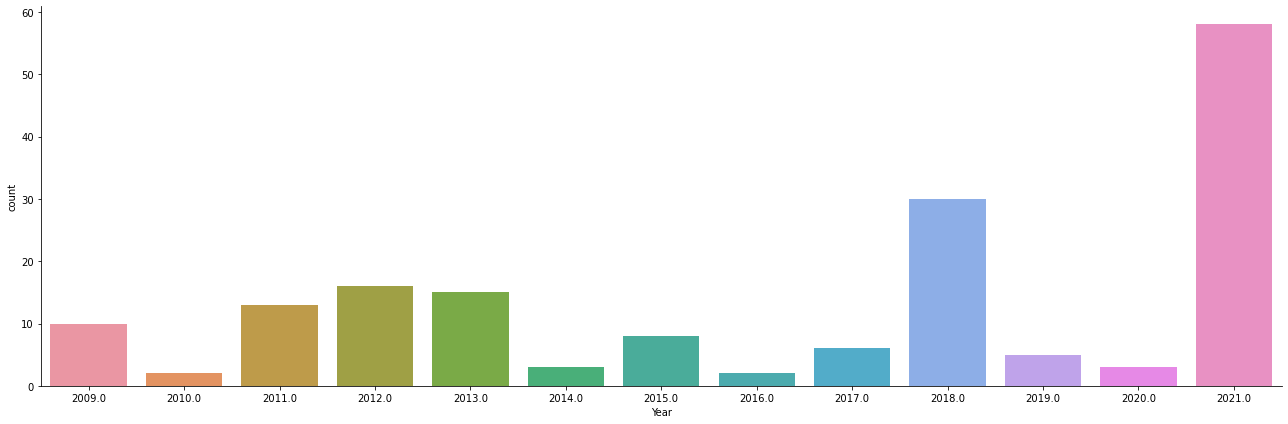

In [276]:
sns.factorplot('Year',data=cyc_df,kind='count',height=6,aspect=3)
#plt.figure(figsize=(15,12))
#date
#plt.figure(figsize=(20,20))

/Users/n.sunik/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/n.sunik/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x1440 with 0 Axes>

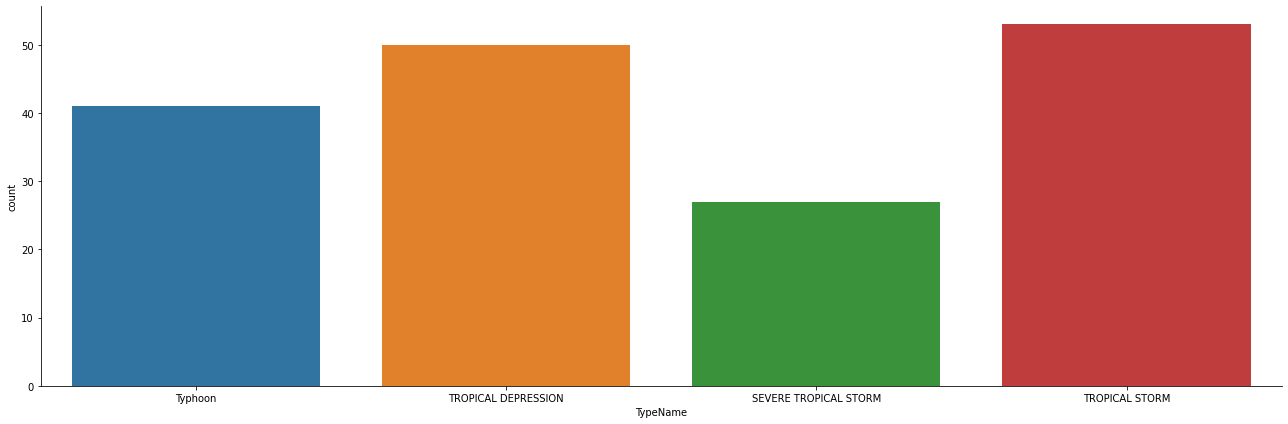

<Figure size 1440x1440 with 0 Axes>

In [277]:
sns.factorplot('TypeName',data=cyc_df,kind='count',height=6,aspect=3)
#plt.figure(figsize=(15,12))
#date
plt.figure(figsize=(20,20))

<Figure size 504x288 with 0 Axes>

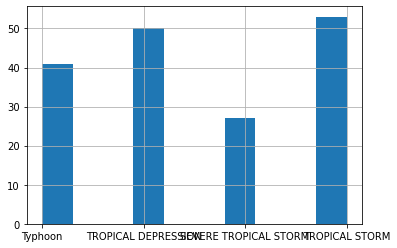

<Figure size 504x288 with 0 Axes>

In [278]:
# histograms
cyc_df['TypeName'].hist()
#figure(figsize=(20,20))
plt.figure(figsize=(7,4))

In [279]:
cyc_df['TypeName']

0             Typhoon
1             Typhoon
2             Typhoon
3             Typhoon
4             Typhoon
            ...      
169    TROPICAL STORM
170    TROPICAL STORM
171    TROPICAL STORM
172    TROPICAL STORM
173    TROPICAL STORM
Name: TypeName, Length: 171, dtype: object

In [280]:
#cyc_df['Type'].dropna([Type.s,Type.ss],inplace=True)

<AxesSubplot:>

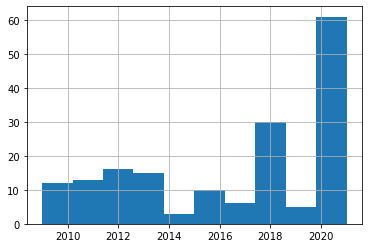

In [281]:
# histograms
cyc_df['Year'].hist()

<AxesSubplot:>

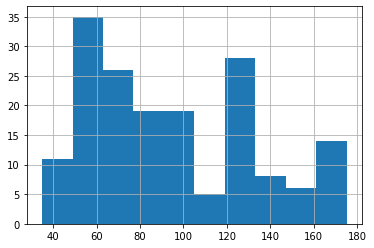

In [282]:
# histograms
cyc_df['Wind(km/h)'].hist()

In [283]:
#not distributed properly

<AxesSubplot:>

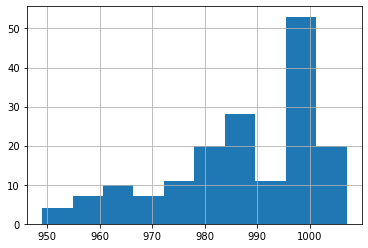

In [284]:
# histograms
cyc_df['Pressure(mb)'].hist()

#left skewed

<AxesSubplot:xlabel='TypeName', ylabel='Wind(km/h)'>

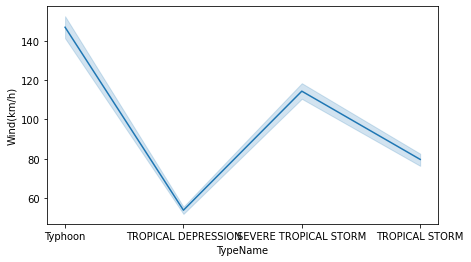

In [285]:
plt.figure(figsize=(7,4))
sns.lineplot(y=cyc_df['Wind(km/h)'], x=cyc_df['TypeName'])

In [286]:
#left skewed

<AxesSubplot:xlabel='Wind(km/h)', ylabel='TypeName'>

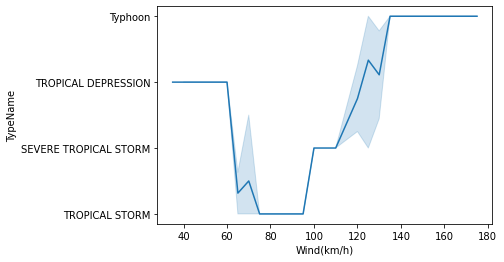

In [287]:
#plt.figure(figsize=(7,4))
sns.lineplot(x=cyc_df['Wind(km/h)'], y=cyc_df['TypeName'])

In [288]:
#Typhoon has a maximum windspeed
#Tropical strom minimum wind speed

<AxesSubplot:xlabel='Wind(km/h)', ylabel='Pressure(mb)'>

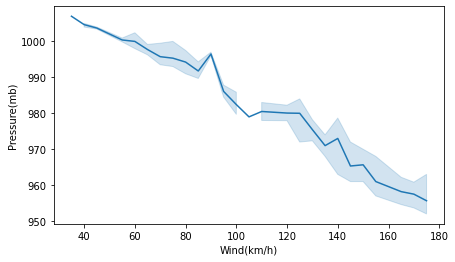

In [289]:
plt.figure(figsize=(7,4))
sns.lineplot(x=cyc_df['Wind(km/h)'], y=cyc_df['Pressure(mb)'])

#when pressure is high wind speed is low

<AxesSubplot:xlabel='Wind(km/h)', ylabel='TypeName'>

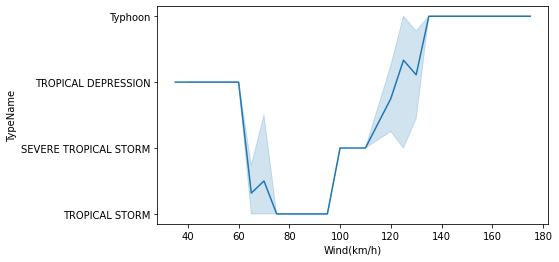

In [290]:
plt.figure(figsize=(7,4))
sns.lineplot(x=cyc_df['Wind(km/h)'], y=cyc_df['TypeName'])

Text(0.5, 1.0, 'Year vs Type')

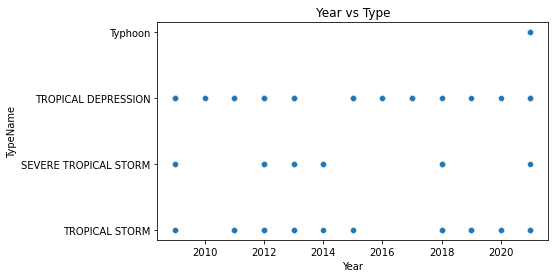

In [291]:
#date
plt.figure(figsize=(7,4))
sns.scatterplot(x=cyc_df['Year'], y=cyc_df['TypeName'])
plt.title('Year vs Type')

Text(0.5, 1.0, 'Year vs Type')

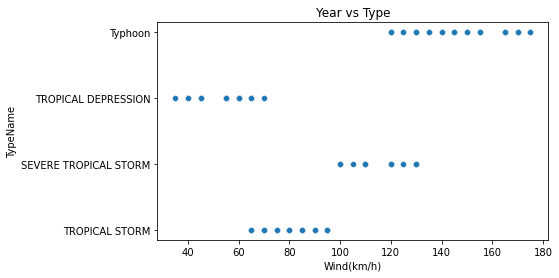

In [292]:
#date
plt.figure(figsize=(7,4))
sns.scatterplot(x=cyc_df['Wind(km/h)'], y=cyc_df['TypeName'])
plt.title('Year vs Type')

Text(0.5, 1.0, 'Pressure(mb) vs TypeName')

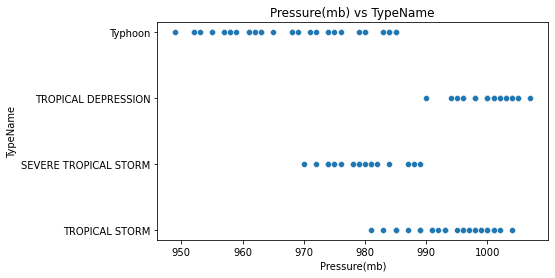

In [293]:
#date
plt.figure(figsize=(7,4))
sns.scatterplot(x=cyc_df['Pressure(mb)'], y=cyc_df['TypeName'])
plt.title('Pressure(mb) vs TypeName')

In [294]:
cyc_df.columns

Index(['Year', 'TypeName', 'Wind(km/h)', 'Pressure(mb)'], dtype='object')

In [295]:
cyc_df['TypeName'].value_counts()

TROPICAL STORM           53
TROPICAL DEPRESSION      50
Typhoon                  41
SEVERE TROPICAL STORM    27
Name: TypeName, dtype: int64

In [296]:
len(TypeName)

4

In [297]:
# scatterplot
colors = ['red', 'orange', 'blue','green']
TypeName = ['TROPICAL STORM','TROPICAL DEPRESSION','Typhoon','SEVERE TROPICAL STORM']

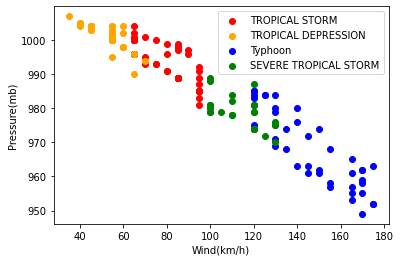

In [298]:
for i in range(len(TypeName)):
    x =cyc_df[cyc_df['TypeName'] == TypeName[i]]
    plt.scatter(x['Wind(km/h)'], x['Pressure(mb)'], c = colors[i], label=TypeName[i])
plt.xlabel("Wind(km/h)")
plt.ylabel("Pressure(mb)")
plt.legend()

In [299]:
cyc_df.corr()

,Year,Wind(km/h),Pressure(mb)
Year,1.000000,0.539226,-0.425370
Wind(km/h),0.539226,1.000000,-0.959354
Pressure(mb),-0.425370,-0.959354,1.000000


<AxesSubplot:>

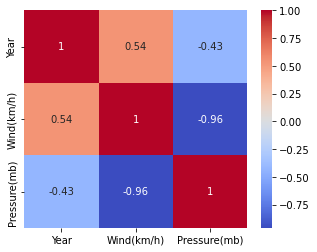

In [300]:
corr = cyc_df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [301]:
cyc_df.head()

,Year,TypeName,Wind(km/h),Pressure(mb)
0,2021.0,Typhoon,170.0,962.0
1,2021.0,Typhoon,165.0,957.0
2,2021.0,Typhoon,170.0,962.0
3,2021.0,Typhoon,175.0,963.0
4,2021.0,Typhoon,120.0,985.0


In [302]:
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [303]:
#cyc_df['TypeName'] = le.fit_transform(cyc_df['TypeName'])
#cyc_df.head()

In [304]:
from sklearn.model_selection import train_test_split
X = cyc_df.drop(columns=['TypeName'])
Y = cyc_df['TypeName']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30) # train-70, test-30

#OR

#from sklearn import model_selection
#te = model_selection.train_test_split
#X = df.drop(columns=['Species'])
#Y = df['Species']
#x_train, x_test, y_train, y_test = te(X, Y, test_size=0.30)'

In [305]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=700)
#OR

#from sklearn import linear_model
#model = linear_model.LogisticRegression()

In [306]:
# model training
model.fit(x_train, y_train)

LogisticRegression(max_iter=700)

In [307]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  96.15384615384616


In [308]:
# print metric to get performance
#print("Accuracy: ",model.score(x_test, y_test) * 100)

In [309]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [310]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [311]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  96.15384615384616


In [312]:
# print metric to get performance
#print("Accuracy: ",model.score(x_test, y_test) * 100)

In [313]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [314]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [315]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  94.23076923076923


In [316]:
# print metric to get performance
#print("Accuracy: ",model.score(x_test, y_test) * 100)

In [317]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [318]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [319]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  94.23076923076923


# Testing with other data

In [ ]:
The Test csv file contains 10 cyclone Type classification 
when testing done with test set it picked the 10 Type of classification

In [320]:
#cyc_df=pd.read_excel('/Users/n.sunik/Downloads/Cyclone Excel File.xlsx')
#/Users/n.sunik/IBM_Internship

In [321]:
cyc_df1=pd.read_csv('/Users/n.sunik/Pictures/Cyclone _Dataset_4.csv')
#/Users/n.sunik/IBM_Internship

In [322]:
cyc_df1.head()

,Sl No.,Name,Year,Date,Time,Type,Wind Speed,Pressure
0,1,Fani,2019,3-May,11:30 AM,EC,215,942
1,2,Fani,2019,3-May,8:30 AM,EC,225,932
2,3,Fani,2019,3-May,5:30 AM,EC,235,923
3,4,Fani,2019,3-May,2:30 AM,SU,245,921
4,5,Fani,2019,2-May,11:30 PM,SU,250,920


In [323]:
cyc_df1.dtypes

Sl No.         int64
Name          object
Year           int64
Date          object
Time          object
Type          object
Wind Speed     int64
Pressure       int64
dtype: object

In [324]:
cyc_df1.Type.value_counts()

C     156
D     114
VC     95
DD     81
EC     73
SC     73
B      45
SU     32
M      30
S       9
Name: Type, dtype: int64

In [325]:
# delete a column
cyc_df1 = cyc_df1.drop(columns = ['Name','Date','Time','Sl No.'])
cyc_df1.head()

,Year,Type,Wind Speed,Pressure
0,2019,EC,215,942
1,2019,EC,225,932
2,2019,EC,235,923
3,2019,SU,245,921
4,2019,SU,250,920


In [326]:
cyc_df1.Type.value_counts()

C     156
D     114
VC     95
DD     81
EC     73
SC     73
B      45
SU     32
M      30
S       9
Name: Type, dtype: int64

In [327]:
len(Type)

10

In [328]:
# scatterplot
colors = ['red', 'orange', 'blue','green','pink','black','yellow','purple','gray','lime']
Type = ['C','D','VC','DD','EC','SC','B','SU','M','S']
#C=Cyclonic Storm

In [329]:
len(Type)

10

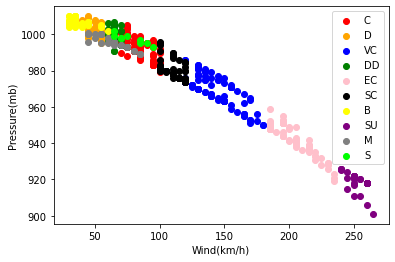

In [330]:
for i in range(len(Type)):
    x =cyc_df1[cyc_df1['Type'] == Type[i]]
    plt.scatter(x['Wind Speed'], x['Pressure'], c = colors[i], label=Type[i])
plt.xlabel("Wind(km/h)")
plt.ylabel("Pressure(mb)")
plt.legend()

1.C=Cyclonic Storm
2.D = Depression
3.VC =Very Severe Cyclonic Storm
4.DD = Deep Depression
5.EC = Extremely severe

In [331]:
from sklearn.model_selection import train_test_split
X = cyc_df1.drop(columns=['Type'])
Y = cyc_df1['Type']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30) # train-70, test-30

In [332]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [333]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [334]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  92.95774647887323


In [335]:
#Accuracy:  92.01877934272301